payment delay leakage

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("profit_leakage_cleaned.csv")

df.head()


,order_id,order_date,customer_id,customer_type,region,sales_channel,product_id,product_category,unit_cost,unit_price,...,refund_amount,inventory_level,reorder_level,holding_cost,payment_delay_days,outstanding_amount,supplier_delay_days,logistics_cost,operational_cost,profit_margin_percent
0,1,2022-01-01 00:00:00,16795,Retail,North,Distributor,435,Automobile,4829.88,888.93,...,0.0,483,189,33.15,18,0.000000,24,659.09,78.99,-455.20
1,2,2022-01-01 00:01:00,1860,Corporate,North,Distributor,235,Pharma,3173.46,4089.16,...,0.0,11,182,208.42,10,0.000000,29,871.93,278.40,-0.05
2,3,2022-01-01 00:02:00,39158,Wholesale,East,Online,729,Electronics,3498.54,3923.52,...,0.0,260,183,346.40,69,71721.553248,11,946.05,1743.35,7.04
3,4,2022-01-01 00:03:00,45732,Retail,South,Distributor,1939,Furniture,628.06,851.16,...,0.0,202,53,43.85,41,4085.993580,17,833.95,716.21,22.22
4,5,2022-01-01 00:04:00,12284,Retail,North,Online,1670,Pharma,1257.04,3229.26,...,0.0,152,185,19.90,21,0.000000,25,540.11,1732.09,32.47


payment delay distribution

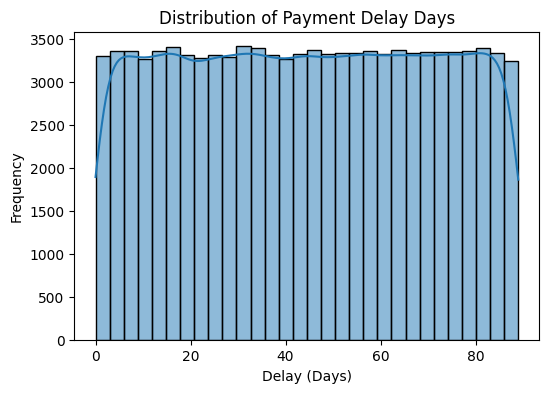

In [2]:
plt.figure(figsize=(6,4))
sns.histplot(df['payment_delay_days'], bins=30, kde=True)
plt.title("Distribution of Payment Delay Days")
plt.xlabel("Delay (Days)")
plt.ylabel("Frequency")
plt.show()


outstanding amount vs payment delay

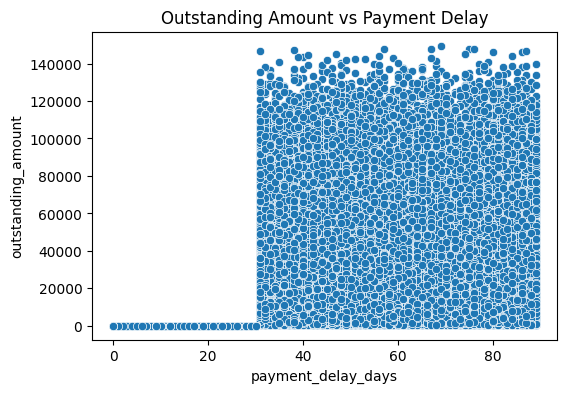

In [3]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    data=df,
    x='payment_delay_days',
    y='outstanding_amount'
)
plt.title("Outstanding Amount vs Payment Delay")
plt.show()


delay risk flag

In [4]:
df['delay_risk_flag'] = (df['payment_delay_days'] > 30).astype(int)

df['delay_risk_flag'].value_counts()


delay_risk_flag
1    65617
0    34383
Name: count, dtype: int64

profit margin impact

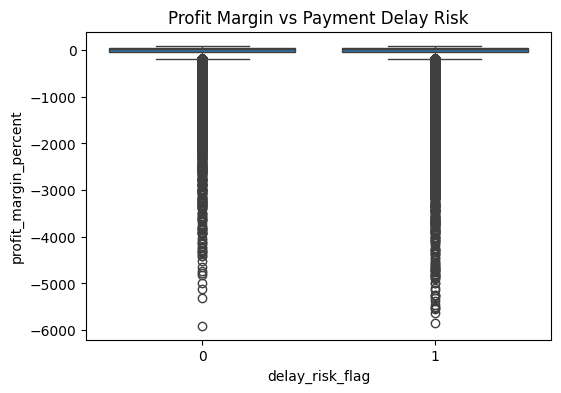

In [5]:
plt.figure(figsize=(6,4))
sns.boxplot(
    data=df,
    x='delay_risk_flag',
    y='profit_margin_percent'
)
plt.title("Profit Margin vs Payment Delay Risk")
plt.show()


leakage summary table

In [6]:
payment_summary = df.groupby('delay_risk_flag').agg({
    'payment_delay_days': 'mean',
    'outstanding_amount': 'sum',
    'profit_margin_percent': 'mean'
}).reset_index()

payment_summary


,delay_risk_flag,payment_delay_days,outstanding_amount,profit_margin_percent
0,0,14.995405,0.000000e+00,-64.322139
1,1,59.998552,2.116911e+09,-66.637851
